In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_wall_z_image(Z_val, fx, fy, cx, cy, szx, szy):
  Z = Z_val*np.ones((szy, szx), dtype=np.float32)
  return Z

def get_road_z_image(H_val, fx, fy, cx, cy, szx, szy):
  y = np.arange(szy).reshape(-1,1)*1.
  y = np.tile(y, (1, szx))
  Z = np.zeros((szy, szx), dtype=np.float32)
  Z[y > cy] = H_val*fy / (y[y>cy]-cy)
  Z[y <= cy] = np.NaN
  return Z

def plot_optical_flow(ax, Z, u, v, cx, cy, szx, szy, s=16):
  # Here is a function for plotting the optical flow. Feel free to modify this 
  # function to work well with your inputs, for example if your predictions are
  # in a different coordinate frame, etc.
  
  x, y = np.meshgrid(np.arange(szx), np.arange(szy))
  ax.imshow(Z, alpha=0.5, origin='upper')
  q = ax.quiver(x[::s,::s], y[::s,::s], u[::s,::s], -v[::s, ::s])
  # ax.quiverkey(q, X=0.5, Y=0.9, U=20, 
  #              label='Quiver key length = 20', labelpos='N')
  ax.axvline(cx)
  ax.axhline(cy)
  ax.set_xlim([0, szx])
  ax.set_ylim([szy, 0])
  ax.axis('equal')

[[0.92251865 0.2609801  0.48121017 ... 0.78442665 0.32367981 0.05433355]
 [0.99460862 0.57033197 0.26447425 ... 0.6331803  0.15044004 0.02350594]
 [0.89147042 0.22781809 0.39306129 ... 0.59215202 0.52312442 0.44180335]
 ...
 [0.82176393 0.01535208 0.16819337 ... 0.77399714 0.66068466 0.15850885]
 [0.7955715  0.34109746 0.77961544 ... 0.33487506 0.80736238 0.38185648]
 [0.86712746 0.50604957 0.76370679 ... 0.03330678 0.33134928 0.8712515 ]]


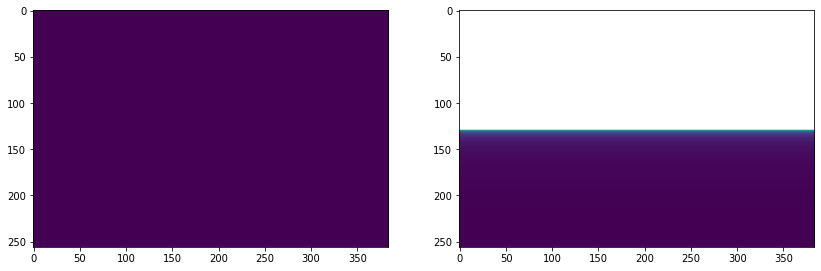

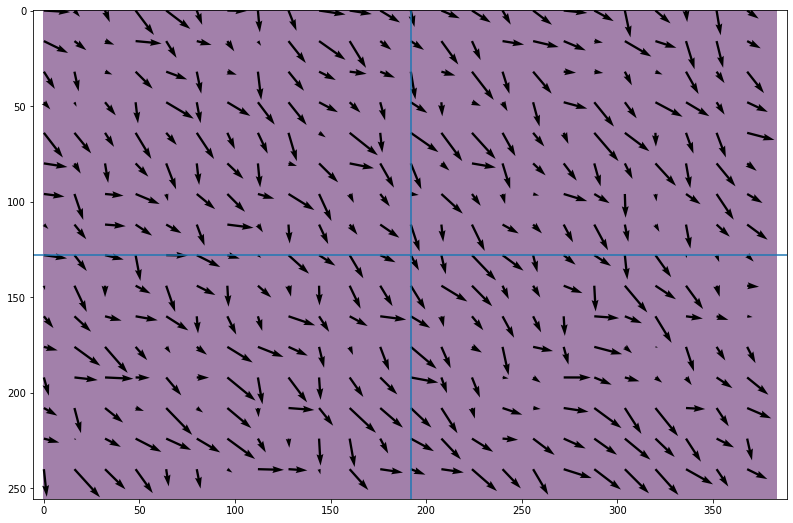

In [12]:
# Focal length along X and Y axis. In class we assumed the smae focal length 
# for X and Y axis. but in general they could be different. We are denoting 
# these by fx and fy.
fx = fy = 128.

# Size of the image
szy = 256
szx = 384

# Center of the image. We are going to assume that the principal point is at 
# the center of the image.
cx = 192
cy = 128

# Gets the image of a wall 2m in front of the camera.
Z1 = get_wall_z_image(2., fx, fy, cx, cy, szx, szy)


# Gets the image of the ground plane that is 3m below the camera.
Z2 = get_road_z_image(3., fx, fy, cx, cy, szx, szy)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))
ax1.imshow(Z1)
ax2.imshow(Z2)

t=np.array([[1.0],[1.0],[1.0]])
w=np.array([[1.0],[1.0],[1.0]])

a=np.array([[-fx,0,cx],[0,-fy,cy]])
b=np.array([[int(cx*cy/fx),-int(fx+(cx*cx)/fx),cy],[int(fy+cy*cy/fy),-int(cx*cy/fy),-cx]])
# np.asmatrix(a)
# np.asmatrix(b)
# np.asmatrix(t)
# np.asmatrix(w)
c=np.dot(a,t)
d=np.dot(b,w)
c=a.dot(t)
d=b.dot(w)
z=100
# c[0][0] =c[0][0]/z
# c[0][1]=c[0][1]/z
c/=z
d/=z
final = np.zeros((2,1))
final = c+d
u1=final[0]
v1=final[1]
u=u1[0]
v=v1[0]
# print(u1)
# print(u)
# Plotting function.
f = plt.figure(figsize=(13.5,9))
# u = np.random.rand(*Z1.shape)
# v = np.random.rand(*Z1.shape)
print(u)
plot_optical_flow(f.gca(), Z1, u, v, cx, cy, szx, szy, s=16)
f.savefig('optical_flow_output.pdf', bbox_inches='tight')